In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
visitors = pd.read_csv('data/2019_2022_Visitors.csv')
states_gdp_2019_2021 = pd.read_csv('data/All_States_2012_2021.csv')
value_gdp_2022 = pd.read_csv('data/Value_Added_Activities_2022.csv')

In [3]:
visitors.head()

,Year,State,Park,Recreation_Visitors,RecV_Days,NonRec_Visits,RecVist_Hours,NonRecVist_Hours
0,2019,Alabama,Horseshoe Bend NMP,45372.0,11749.0,0.0,140988.0,0.0
1,2019,Alabama,Little River Canyon NPRES,649986.0,132309.0,0.0,1587719.0,0.0
2,2019,Alabama,Natchez Trace PKWY,440724.0,147863.0,641224.0,1774356.0,641224.0
3,2019,Alabama,Russell Cave NM,16642.0,2406.0,0.0,28875.0,0.0
4,2019,Alabama,Tuskegee Airmen NHS,30097.0,3762.0,0.0,45145.0,0.0


In [4]:
states_gdp_2019_2021.head()

,GeoName,Region,LineCode,Description,Unit,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,Alabama,5,1,Total Outdoor Recreation,Thousands of dollars,3807374,3886358,3881184,3987073,4085363,4226937,4450364,4605097,4166573,5028892
1,Alabama,5,2,Total Core Outdoor Recreation,Thousands of dollars,2065590,2139978,2142642,2205932,2253928,2350128,2425391,2504979,2496455,2776879
2,Alabama,5,3,Conventional Outdoor Recreation,Thousands of dollars,1422123,1474936,1475274,1534439,1582240,1662153,1666901,1703414,1832269,2001314
3,Alabama,5,4,Bicycling,Thousands of dollars,12660,13251,13137,13049,13048,14170,13435,14073,17276,19091
4,Alabama,5,5,Boating/Fishing,Thousands of dollars,215849,217589,222706,238993,269961,296761,305603,326285,490274,405721


In [5]:
value_gdp_2022.head()

,State,Total outdoor recreation activities,Conventional outdoor recreation activities,Boating / fishing,RVing,Snow activities,Other outdoor recreation activities,Game areas (including golf and tennis),All other supporting outdoor recreation,Government expenditures
0,Alabama,"5,516,856","2,254,158","404,424","490,057","21,078","880,178","245,325","2,252,297","130,224"
1,Alaska,"2,610,538","417,107","101,653","97,544","26,818","336,722","14,120","1,822,592","34,117"
2,Arizona,"11,703,617","3,724,990","372,793","947,008","54,855","2,063,966","587,171","5,604,789","309,871"
3,Arkansas,"4,114,256","1,770,538","452,703","278,564","21,363","608,988","170,397","1,660,381","74,349"
4,California,"73,827,997","22,012,853","2,414,941","3,401,786","688,228","15,883,873","2,670,339","30,823,356","5,107,914"


In [6]:
byyear = visitors.groupby(['Year']).mean('Recreation_Visitors').reset_index()

In [7]:
byyear

,Year,Recreation_Visitors,RecV_Days,NonRec_Visits,RecVist_Hours,NonRecVist_Hours
0,2019,812696.334988,295692.248139,420468.099256,3.548312e+06,230546.578164
1,2020,581039.995098,215471.879902,363814.551471,2.585668e+06,196737.252451
2,2021,719407.750605,273740.014528,382747.414044,3.284886e+06,209790.353511
3,2022,753589.391304,273539.599034,393113.893720,3.282481e+06,209984.132850


C:\Users\nyssa\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\nyssa\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Year', ylabel='Recreation_Visitors'>

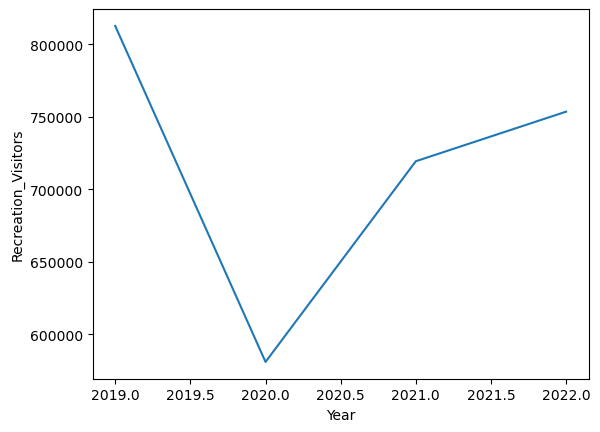

In [8]:
sns.lineplot(data=byyear, x="Year", y="Recreation_Visitors")